In [2]:
pip install tensorflow matplotlib 

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.2 MB 1


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# revisione dell'esempio 1 relativo
# alla rete LeNet5, applicando
# la batch normalization

# importazione librerie necessarie
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow.keras as keras

# download dataset e normalizzazione
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# conversione in float32 da int8 del dataset originale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizzazione nell'intervallo [0, 1]
x_train /= 255
x_test /= 255

# one-hot encoding delle label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape del dataset (era un array monodimensionale)
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [4]:
#
# definizione del modello LeNet-5
#

# creazione del modello 
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# aggiunto layer di batch normalization
model.add(layers.BatchNormalization())

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# aggiunto layer di batch normalization
model.add(layers.BatchNormalization())

# C5 Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# aggiunto layer di batch normalization
model.add(layers.BatchNormalization())

# Appiattimento dei dati dei layer convolutivi per poterli usare nei seguenti layer pienamente connessi
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

# aggiunto layer di batch normalization
model.add(layers.BatchNormalization())

# Output Layer con attivazione di tipo softmax 
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

model.summary()

c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 27, 27, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 11, 11, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 120)      │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │       494,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546,450 (2.08 MB)

 Trainable params: 545,998 (2.08 MB)

 Non-trainable params: 452 (1.77 KB)

In [5]:
# addestramento
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
469/469 - 17s - 36ms/step - accuracy: 0.9334 - loss: 0.2437 - val_accuracy: 0.9656 - val_loss: 0.1409
Epoch 2/10
469/469 - 18s - 39ms/step - accuracy: 0.9731 - loss: 0.1030 - val_accuracy: 0.9800 - val_loss: 0.0754
Epoch 3/10
469/469 - 19s - 40ms/step - accuracy: 0.9814 - loss: 0.0726 - val_accuracy: 0.9830 - val_loss: 0.0615
Epoch 4/10
469/469 - 16s - 34ms/step - accuracy: 0.9851 - loss: 0.0570 - val_accuracy: 0.9854 - val_loss: 0.0525
Epoch 5/10
469/469 - 17s - 36ms/step - accuracy: 0.9876 - loss: 0.0475 - val_accuracy: 0.9859 - val_loss: 0.0458
Epoch 6/10
469/469 - 17s - 37ms/step - accuracy: 0.9894 - loss: 0.0412 - val_accuracy: 0.9877 - val_loss: 0.0416
Epoch 7/10
469/469 - 19s - 40ms/step - accuracy: 0.9910 - loss: 0.0359 - val_accuracy: 0.9879 - val_loss: 0.0402
Epoch 8/10
469/469 - 18s - 39ms/step - accuracy: 0.9920 - loss: 0.0316 - val_accuracy: 0.9880 - val_loss: 0.0391
Epoch 9/10
469/469 - 19s - 41ms/step - accuracy: 0.9934 - loss: 0.0283 - val_accuracy: 0.9872 - 

In [6]:
# valutazione del modello

test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0417
Test loss 0.0327, accuracy 99.02%


Text(0, 0.5, 'acc')

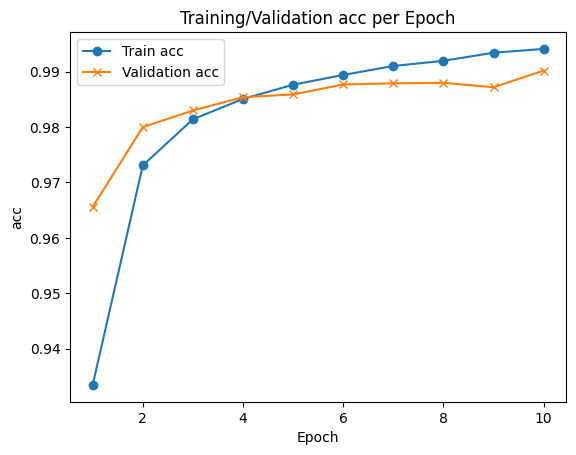

In [7]:
# visualizzazione del processo di addestramento
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

# disegno della legenda nella migliore posizione automaticamente: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')